<a href="https://colab.research.google.com/github/lifepopkay/Tech-Monies/blob/Modelling/Updated_Models_using_Lasso_(For_UK%2C_IND%2C_and_US).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries

In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
url = 'https://raw.githubusercontent.com/lifepopkay/Tech-Monies/Modelling/Mergered%20Cleaned%20Data%20(1).csv'
df_B = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/lifepopkay/Tech-Monies/Modelling/Mergered%20Cleaned%20Data%203.csv'
df_C = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/lifepopkay/Tech-Monies/Modelling/Filled_yoe_and_position.csv'
df_filled = pd.read_csv(url)

In [128]:
print(df_B.shape)
df_B.head(2)

(9709, 18)


,Unnamed: 0,id,company,location,postDate,title scraped for,Country,upper_salary,lower_salary,payment_frequency,State,age,Position,year_of_exp,contract_type,eligibility,title_cleaned,skills_list
0,0,job_3e1d31dda6c5cb4b,Offerzen,Lagos,Just posted,Data Scientist,Nigeria,NaN,NaN,NaN,Lagos,NaN,Senior Level,2.0,Full-time,NaN,Senior Software Engineer,"['AWS', 'D', 'C', 'asp', 'R']"
1,1,job_c3e2ed6ba483528b,GVA Partners,Lagos,Today,Data Scientist,Nigeria,NaN,NaN,NaN,Lagos,NaN,NaN,4.0,NaN,undergraduate,Data Scientist,"['D', 'C', 'R', 'KNN', 'asp', 'PL/SQL', 'serve..."


In [129]:
print(df_C.shape)
df_C.head(2)

(18426, 17)


,id,company,location,postDate,title scraped for,Country,State,age,Position,upper_salary,lower_salary,payment_frequency,year_of_exp,contract_type,eligibility,title_cleaned,skills_list
0,job_3e1d31dda6c5cb4b,Offerzen,Lagos,Just posted,Data Scientist,Nigeria,Lagos,NaN,Senior Level,NaN,NaN,NaN,2.0,Full-time,NaN,Senior Software Engineer,"['asp', 'C', 'R', 'D', 'AWS']"
1,job_c3e2ed6ba483528b,GVA Partners,Lagos,Today,Data Scientist,Nigeria,Lagos,NaN,NaN,NaN,NaN,NaN,4.0,NaN,undergraduate,Data Scientist,"['Regression', 'C', 'KNN', 'Python', 'D', 'asp..."


In [130]:
df = pd.concat([df_B, df_C], ignore_index=True)

In [131]:
#url = 'https://raw.githubusercontent.com/lifepopkay/Tech-Monies/Modelling/Cleaned%20Data.csv'
#df = pd.read_csv("Mergered Cleaned Data.csv")

In [132]:
df.head(2)

,Unnamed: 0,id,company,location,postDate,title scraped for,Country,upper_salary,lower_salary,payment_frequency,State,age,Position,year_of_exp,contract_type,eligibility,title_cleaned,skills_list
0,0.0,job_3e1d31dda6c5cb4b,Offerzen,Lagos,Just posted,Data Scientist,Nigeria,NaN,NaN,NaN,Lagos,NaN,Senior Level,2.0,Full-time,NaN,Senior Software Engineer,"['AWS', 'D', 'C', 'asp', 'R']"
1,1.0,job_c3e2ed6ba483528b,GVA Partners,Lagos,Today,Data Scientist,Nigeria,NaN,NaN,NaN,Lagos,NaN,NaN,4.0,NaN,undergraduate,Data Scientist,"['D', 'C', 'R', 'KNN', 'asp', 'PL/SQL', 'serve..."


In [133]:
# Standardizing the title 
ML=['Machine Learning', 'Machine Learning ']
for title in ML:
    df['title scraped for'].replace(title,'Machine Learning Engineer', inplace = True)

In [134]:
# Dropping records with missing values for lower salary range
df.dropna(subset=["lower_salary"], inplace = True)

In [135]:
df.shape

(11361, 18)

In [136]:
#df.drop_duplicates(subset = "id", inplace = True, ignore_index = True)

In [137]:
# Columns to drop
columns_to_drop = ["company", "location", "State", "age", "Unnamed: 0", "id","postDate"]

In [138]:
# Dropping records for canada
df = df.query("Country != 'Canada' and Country != 'Nigeria'")
# Dropping records for data engineering
df = df[df["title scraped for"] != "Data Engineer"]

# Drop unnecessary columns
df.drop(columns_to_drop, axis="columns", inplace = True)

In [139]:
df.Country.value_counts()

USA      4466
UK       3115
India    1832
Name: Country, dtype: int64

In [140]:
# Defining a function that replaces all values o years of eperience greater than 30 with np.nan
def yoe_greater_than_30(yoe):
    if yoe > 30:
        return np.nan
    else:
        return yoe
df.year_of_exp = df.year_of_exp.apply(yoe_greater_than_30)

In [141]:
# Replace "hs" with "high school diploma" in eligibility
df.eligibility.replace("hs",'high school diploma', inplace = True)

# Fill missing values for eligibility with "high school diploma"
df.eligibility.fillna('high school diploma', inplace = True)

In [142]:
# Fill missing values for contract_type with the mode of contract_type
df.contract_type.fillna(df.contract_type.mode()[0], inplace = True)

In [143]:
# Creating an exchange rate for each country currency with respect to UD dollars
Exchange_rate = {"Nigeria": 427.88,
"India": 79.97,
"USA": 1,
"UK": 1.17}
df["Exchange_rate"] = df.Country.map(Exchange_rate)

# Converting the salary currency for each Job to US dollars
df.upper_salary = df.upper_salary / df.Exchange_rate
df.lower_salary = df.lower_salary / df.Exchange_rate

df.drop('Exchange_rate', axis= "columns", inplace = True)

On exploring the salary for missing Payment frequency, it was discovered that the salary far exceeds the salary for hourly payment frequency and is far below the salary for minthly payment frequency. 

So the the missing values for payment frequency will be filled with "Weekly"

In [144]:
# Filling the missing values for payment frequency with "Weekly"
df.payment_frequency.fillna("Weekly", inplace = True)

In [145]:
# Defining a function that cleans the skills column
def convert_skill_list_to_list(skills):
    skills = skills.replace("[", "")
    skills = skills.replace("]","")
    skills = skills.replace("'", "")
    Skills_list = skills.split(",")
    Skills_lists = []
    for skill in Skills_list:
        skill = skill.strip()
        Skills_lists.append(skill)
    return Skills_lists

In [146]:
#convert_skill_list_to_list(df.skills_list)

In [147]:
df.skills_list = df.skills_list.apply(convert_skill_list_to_list)

In [148]:
# Defining a function that counts the number of job posting that require a particular skill
def Skills_table(df):
    list_skill = {}
    for Skill_list in df.skills_list:
        for Skill in Skill_list:
            if Skill in list_skill:
                list_skill[Skill] += 1
            else:
                list_skill[Skill] = 1
    skill_df = pd.DataFrame(list_skill, index = ["Number of jobs"]).T.sort_values("Number of jobs", ascending = False)
    return skill_df

In [149]:
# Selecting the Job postings for data analyst roles
DA_df = df[df["title scraped for"] == "Data Analyst"]

# Selecting the Job postings for data scientist roles
DS_df = df[df["title scraped for"] == "Data Scientist"]

# Selecting the Job postings for business analyst roles
BA_df = df[df["title scraped for"] == "Business Analyst"]

# Selecting the Job postings for machine learning engineering roles
ML_df = df[df["title scraped for"] == "Machine Learning Engineer"]

# Selecting the Job postings for web developer roles
WD_df = df[df["title scraped for"] == "Web Developer"]

In [150]:
# Selecting the Skills required for Data analyst roles
DASkills_df = Skills_table(DA_df)

# Saving the top 10 skills for Data Analyst to a list
DAT10_skills = list(DASkills_df.head(10).index)

# Selecting the Skills required for Data scientist roles
DSSkills_df = Skills_table(DS_df)

# Saving the top 10 skills for Data Scientist to a list
DST10_skills = list(DSSkills_df.head(10).index)

# Selecting the Skills required for Business analyst roles
BASkills_df = Skills_table(BA_df)

# Saving the top 10 skills for Business Analyst to a list
BAT10_skills = list(BASkills_df.head(10).index)

# Selecting the Skills required for Machine learning roles
MLSkills_df = Skills_table(ML_df)

# Saving the top 10 skills for Machine learning to a list
MLT10_skills = list(MLSkills_df.head(10).index)

# Selecting the Skills required for Web developer roles
WDSkills_df = Skills_table(WD_df)

# Saving the top 10 skills for Web developer to a list
WDT10_skills = list(WDSkills_df.head(10).index)

# Merging the top 10 skills for each role into a set
Most_popular_skills = set(DAT10_skills + DST10_skills + BAT10_skills + MLT10_skills + WDT10_skills)

len(list(Most_popular_skills))

23

In [151]:
# Dropping records with missing values for lower salary range
#df.dropna(subset=["lower_salary"], inplace = True)

In [152]:
df_IND = df.query("Country == 'India'")
df_IND = df_IND.sample(5000, replace = True, random_state = 243)
df_UK = df.query("Country == 'UK'")
df_UK = df_UK.sample(5000, replace = True, random_state = 243)
df_US = df.query("Country == 'USA'")
df_US = df_US.sample(5000, replace = True, random_state = 243)
df = pd.concat([df_IND,df_UK, df_US ], ignore_index=True)

In [157]:
df.Country.value_counts()

India    5000
UK       5000
USA      4443
Name: Country, dtype: int64

In [154]:
# Dropping missing values for title scraped for
df.dropna(subset = ["title scraped for"], inplace = True)

In [159]:
df.year_of_exp = df_filled.year_of_exp

In [160]:
# Determining the average years of experience for each role and position
df.groupby(["Country","title scraped for","Position"])[["year_of_exp"]].agg(np.mean)

year_of_exp
Country title scraped for         Position                 
India   Business Analyst          Mid-Level        2.000000
                                  Senior Level     4.760000
        Data Analyst              Senior Level     2.598365
        Data Scientist            Mid-Level        1.805160
                                  Senior Level     2.286280
        Machine Learning Engineer Mid-Level        1.960000
                                  Senior Level     2.952381
        Web Developer             Mid-Level        1.804348
                                  Senior Level     2.504292
UK      Business Analyst          Mid-Level        3.000000
                                  Senior Level     3.000000
        Data Analyst              Senior Level     4.164353
        Data Scientist            Entry Level      3.076468
                                  Mid-Level        3.315471
                                  Senior Level     4.361030
        Machine Learning Engineer Mid-Level        9.000000
                                  Senior Level     9.000000
        Web Developer             Mid-Level        3.603350
                                  Senior Level     4.142639
USA     Business Analyst          Entry Level      4.500000
                                  Mid-Level        3.886349
                                  Senior Level     4.103072
        Data Analyst              Entry Level      3.265765
                                  Mid-Level        3.837836
                                  Senior Level     4.014083
        Data Scientist            Entry Level      7.500000
                                  Mid-Level        4.586341
                                  Senior Level     4.157177
        Machine Learning Engineer Entry Level      3.754656
                                  Mid-Level        3.927271
                                  Senior Level     4.001802
        Web Developer             Entry Level      3.764946
                                  Mid-Level        4.110361
                                  Senior Level     4.433865

In [161]:
# Defining a function that determines the Position based on years of expereience
def Position_based_on_yoe(data):
    data.reset_index(drop=True, inplace = True)
    for i in range(data.shape[0]):
        if  data.loc[i,"Position"] is np.nan:
            if data.loc[i,"title scraped for"] == 'Business Analyst':
                if  data.loc[i,"year_of_exp"] >= 3 and data.loc[i,"year_of_exp"] <= 5:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 5:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] < 3:
                    data.loc[i,"Position"] = "Entry Level"

            elif data.loc[i,"title scraped for"] == 'Data Analyst':
                if  data.loc[i,"year_of_exp"] > 2 and data.loc[i,"year_of_exp"] <= 4:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 4:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] <= 2:
                    data.loc[i,"Position"] = "Entry Level"

            elif data.loc[i,"title scraped for"]== 'Data Scientist':
                if  data.loc[i,"year_of_exp"] > 2 and data.loc[i,"year_of_exp"] <= 4:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 4:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] <= 2:
                    data.loc[i,"Position"] = "Entry Level"
            elif data.loc[i,"title scraped for"] == 'Machine Learning Engineer':
                if  data.loc[i,"year_of_exp"] > 3 and data.loc[i,"year_of_exp"] <= 5:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 5:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] <= 3:
                    data.loc[i,"Position"] = "Entry Level"

            elif data.loc[i,"title scraped for"] == 'Web Developer':
                if  data.loc[i,"year_of_exp"] >= 2 and data.loc[i,"year_of_exp"] <= 4:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 4:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] < 2:
                    data.loc[i,"Position"] = "Entry Level"
        
        else:
            data.loc[i,"Position"] = data.loc[i,"Position"]
    return data

In [162]:
# Making a copy of the data 
data = df.copy()

# Determining the position using the Position_based_on_yoe function
df = Position_based_on_yoe(data)

In [163]:
# Defining a function that counts the number of recors we have for each level for each role for each country
def number_of_observations(data):
    return data.groupby(["Country","title scraped for","Position"]).agg({"Position":"count"})

number_of_observations(df)

Position
Country title scraped for         Position              
India   Business Analyst          Entry Level        240
                                  Mid-Level          176
                                  Senior Level        46
        Data Analyst              Entry Level        210
                                  Mid-Level          114
                                  Senior Level        82
        Data Scientist            Entry Level        323
                                  Mid-Level          517
                                  Senior Level       181
        Machine Learning Engineer Entry Level        402
                                  Mid-Level          209
                                  Senior Level       180
        Web Developer             Entry Level       1053
                                  Mid-Level          915
                                  Senior Level       352
UK      Business Analyst          Mid-Level          596
                                  Senior Level       105
        Data Analyst              Senior Level       744
        Data Scientist            Entry Level        107
                                  Mid-Level          247
                                  Senior Level      1219
        Machine Learning Engineer Mid-Level            5
                                  Senior Level       517
        Web Developer             Entry Level         68
                                  Mid-Level          424
                                  Senior Level       968
USA     Business Analyst          Entry Level        175
                                  Mid-Level          670
                                  Senior Level       359
        Data Analyst              Entry Level         59
                                  Mid-Level          148
                                  Senior Level       300
        Data Scientist            Entry Level        140
                                  Mid-Level          256
                                  Senior Level       750
        Machine Learning Engineer Entry Level        227
                                  Mid-Level          233
                                  Senior Level       306
        Web Developer             Entry Level         36
                                  Mid-Level          166
                                  Senior Level       257

In [164]:
Frequency_to_yearly = {"Hourly": 40 * 52,
"Weekly": 52,
"Monthly": 12,
"Yearly": 1}
df["Frequency_to_yearly"] = df.payment_frequency.map(Frequency_to_yearly)

# Standardizing the payment frequency to Yearly
df.upper_salary = df.upper_salary * df["Frequency_to_yearly"]
df.lower_salary = df.lower_salary * df["Frequency_to_yearly"]
df.drop('Frequency_to_yearly', axis= "columns", inplace = True)

In [165]:
# Drop unecessary columns
df.drop(['title_cleaned','payment_frequency'], axis="columns", inplace = True)

In [166]:
# Determining the average upper and lower salary for each level for each title for each country
df.groupby(["Country", "title scraped for", "Position"])[["lower_salary","upper_salary"]].agg(np.mean)

lower_salary   upper_salary
Country title scraped for         Position                                  
India   Business Analyst          Entry Level     3907.163520    6784.236900
                                  Mid-Level       7837.070578   16768.535483
                                  Senior Level   13955.581169   21205.212824
        Data Analyst              Entry Level     4043.666375    7217.712559
                                  Mid-Level       6793.132403   12503.325614
                                  Senior Level   14340.536238   24306.752713
        Data Scientist            Entry Level     7237.743101   14224.016135
                                  Mid-Level       9659.944336   16999.810319
                                  Senior Level   15876.119291   28230.524123
        Machine Learning Engineer Entry Level     9727.523101   12016.239981
                                  Mid-Level      10704.867196   20941.295623
                                  Senior Level   15724.952413   28464.377845
        Web Developer             Entry Level     3172.064785    6399.122455
                                  Mid-Level       5806.291772    8980.225756
                                  Senior Level    7872.054933   13666.589933
UK      Business Analyst          Mid-Level      34164.013365   38137.101787
                                  Senior Level   42658.103378   52415.625685
        Data Analyst              Senior Level   34463.526560   44828.690754
        Data Scientist            Entry Level    47836.983785   60246.654878
                                  Mid-Level      44120.983425   52280.905619
                                  Senior Level   51280.775611   64858.923940
        Machine Learning Engineer Mid-Level      52136.752137   55555.555556
                                  Senior Level   44220.940998   53418.055272
        Web Developer             Entry Level    50145.575666   36394.342694
                                  Mid-Level      43271.111111   53469.709073
                                  Senior Level   40326.618457   51540.159574
USA     Business Analyst          Entry Level    75256.664000   94589.132026
                                  Mid-Level      76145.068955   97448.840770
                                  Senior Level   84052.118106  107487.308257
        Data Analyst              Entry Level    67417.762712   84055.963636
                                  Mid-Level      73045.921622   89994.721986
                                  Senior Level   78365.944000   97597.885714
        Data Scientist            Entry Level   102462.271429  127630.099174
                                  Mid-Level     104500.710938  131911.277273
                                  Senior Level  108998.419467  138328.970809
        Machine Learning Engineer Entry Level    97609.344493  127578.369725
                                  Mid-Level     104731.217167  133374.439815
                                  Senior Level  114897.277778  143934.816949
        Web Developer             Entry Level    86341.111111  116216.551724
                                  Mid-Level      83311.059036  106161.823313
                                  Senior Level   97679.515953  123789.163563

In [167]:
df.shape

(14443, 9)

In [168]:
df_years_missing = df[df.year_of_exp.isna()]
df.dropna(subset=["year_of_exp"], inplace = True)

In [169]:
categorical_columns = ["title scraped for",'Country','Position','contract_type','eligibility']
rated_dummies = pd.get_dummies(df, columns=categorical_columns,drop_first = True)
#df = pd.concat([df, rated_dummies], axis=1)

In [170]:
rated_dummies.head()

,upper_salary,lower_salary,year_of_exp,skills_list,title scraped for_Data Analyst,title scraped for_Data Scientist,title scraped for_Machine Learning Engineer,title scraped for_Web Developer,Country_UK,Country_USA,Position_Mid-Level,Position_Senior Level,contract_type_Full-time,eligibility_high school diploma,eligibility_postgraduate,eligibility_undergraduate
0,5251.969489,3301.237964,1.0,"[jQuery, D, C, CSS, Go, HTML, R, Java, ML]",0,0,0,1,0,0,0,1,1,1,0,0
1,31261.723146,25009.378517,4.0,[R],0,0,1,0,0,0,1,0,1,1,0,0
2,6768.738277,3064.149056,2.0,"[D, C, Machine Learning, R, ML]",0,0,1,0,0,0,0,0,1,0,0,1
3,7494.560460,2041.815681,1.0,"[SQL, D, C, CSS, Laravel, HTML, R, PHP, Java, ...",0,0,0,1,0,0,0,1,1,0,0,1
4,5251.969489,1500.562711,1.0,[R],0,0,0,1,0,0,0,0,1,0,1,0


In [171]:
df = rated_dummies.copy()

In [172]:
# Dropping the skills list column
df.drop(["skills_list"], axis="columns", inplace = True)

In [173]:
df.head()

,upper_salary,lower_salary,year_of_exp,title scraped for_Data Analyst,title scraped for_Data Scientist,title scraped for_Machine Learning Engineer,title scraped for_Web Developer,Country_UK,Country_USA,Position_Mid-Level,Position_Senior Level,contract_type_Full-time,eligibility_high school diploma,eligibility_postgraduate,eligibility_undergraduate
0,5251.969489,3301.237964,1.0,0,0,0,1,0,0,0,1,1,1,0,0
1,31261.723146,25009.378517,4.0,0,0,1,0,0,0,1,0,1,1,0,0
2,6768.738277,3064.149056,2.0,0,0,1,0,0,0,0,0,1,0,0,1
3,7494.560460,2041.815681,1.0,0,0,0,1,0,0,0,1,1,0,0,1
4,5251.969489,1500.562711,1.0,0,0,0,1,0,0,0,0,1,0,1,0


In [174]:
df.isna().sum()

upper_salary                                   2584
lower_salary                                      0
year_of_exp                                       0
title scraped for_Data Analyst                    0
title scraped for_Data Scientist                  0
title scraped for_Machine Learning Engineer       0
title scraped for_Web Developer                   0
Country_UK                                        0
Country_USA                                       0
Position_Mid-Level                                0
Position_Senior Level                             0
contract_type_Full-time                           0
eligibility_high school diploma                   0
eligibility_postgraduate                          0
eligibility_undergraduate                         0
dtype: int64

In [175]:
df.shape

(13955, 15)

### Categorical Column Coding map

### Features

In [176]:
df1 = df.copy()
# Saving all the features used in developing the model to a dictionary in the order they were used
features_dict = {}
i = 0
for feature in list(df1.drop(["lower_salary", "upper_salary"], axis="columns").columns):
    features_dict[i] = feature
    i +=1
    
print(features_dict)

{0: 'year_of_exp', 1: 'title scraped for_Data Analyst', 2: 'title scraped for_Data Scientist', 3: 'title scraped for_Machine Learning Engineer', 4: 'title scraped for_Web Developer', 5: 'Country_UK', 6: 'Country_USA', 7: 'Position_Mid-Level', 8: 'Position_Senior Level', 9: 'contract_type_Full-time', 10: 'eligibility_high school diploma', 11: 'eligibility_postgraduate', 12: 'eligibility_undergraduate'}


In [177]:
def get_weights_df(model, feat, col_name, col_name_2):
#this function returns the weight of every feature
    weights_lower_salary = pd.Series(model.coef_[0], feat.columns).sort_values()
    weights_lower_salary_df = pd.DataFrame(weights_lower_salary).reset_index()
    weights_lower_salary_df.columns = ['Features', col_name]
    weights_lower_salary_df[col_name].round(3)
    
    weights_upper_salary = pd.Series(model.coef_[1], feat.columns).sort_values()
    weights_upper_salary_df = pd.DataFrame(weights_upper_salary).reset_index()
    weights_upper_salary_df.columns = ['Features', col_name_2]
    weights_upper_salary_df[col_name_2].round(3)
    
    weights_df = weights_lower_salary_df.merge(weights_upper_salary_df,how = 'inner', on="Features")
    return weights_df

### Using Lasso Regression model

In [178]:
def Data_preprocessing(UK_IND_US_JOBS):
    # Reseting the index for UK_IND_US_JOBS
    UK_IND_US_JOBS.reset_index(drop=True, inplace = True)
    # Making a duplicate for UK_IND_US_JOBS
    UK_IND_US_JOBS_2 = UK_IND_US_JOBS.copy()
    # Preserving Position, Upper and lower salary columns by dropping them
    UK_IND_US_JOBS.drop(["upper_salary", "lower_salary"], axis="columns", inplace = True)

    # Fill the missing values for Years of experience using an iterative imputer
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute       import IterativeImputer
    #from catboost             import CatBoostRegressor

    imputer = IterativeImputer(
                                verbose   = 2,
                                max_iter  = 20,
                                imputation_order = 'descending' )


    UK_IND_US_JOBS = pd.DataFrame(imputer.fit_transform(UK_IND_US_JOBS), columns = UK_IND_US_JOBS.columns) # preserve the column nam

    # Restoring the Position, uppper and lower salary
    UK_IND_US_JOBS_2[list(UK_IND_US_JOBS.columns)] = UK_IND_US_JOBS

    # Fill the missing values for upper salary using an iterative imputer
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute       import IterativeImputer
    #from catboost             import CatBoostRegressor

    imputer = IterativeImputer(
                                verbose   = 2,
                                max_iter  = 20,
                                imputation_order = 'descending' )


    df2 = pd.DataFrame(imputer.fit_transform(UK_IND_US_JOBS_2), columns = UK_IND_US_JOBS_2.columns) # preserve the column nam
    
    df2 = UK_IND_US_JOBS_2.dropna(subset=["upper_salary"])
    # Extracting the features and target variable
    y = df2[["lower_salary", "upper_salary"]].values
    X = df2.drop(["lower_salary", "upper_salary"], axis="columns")
    XX = df2.drop(["lower_salary", "upper_salary"], axis="columns")


    # Normalizing the data
    #X= StandardScaler().fit(X).transform(X)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
    print ('Train set:', X_train.shape,  y_train.shape)
    print ('Test set:', X_test.shape,  y_test.shape)
    return XX, X_train, X_test, y_train, y_test

In [179]:
# Determing the optimum alpha for the lasso regression model
def Lasso_Model(X_train, y_train):
    rscore = []
    for alpha in range(5000):
        lasso_reg = Lasso(alpha=alpha)
        lasso_reg.fit(X_train, y_train)
        yhat = lasso_reg.predict(X_train)
        rscore_ = r2_score(y_train, yhat)
        rscore.append(rscore_)
    rscore = np.array(rscore)

    # Making a plot of the rscore of each alpha from 0 to 5000
    plt.plot(rscore)
    plt.xlabel("Alpha")
    plt.ylabel("rscore")
    plt.show()
    plt.clf()

    lasso_reg = Lasso(alpha=rscore.argmax())
    lasso_reg.fit(X_train, y_train)
    yhat = lasso_reg.predict(X_train)
    print(r2_score(y_train, yhat))
    return lasso_reg

In [180]:
def Lasso_model_test(X_test,y_test, lasso_reg):   
    yhat_test = lasso_reg.predict(X_test)
    print(r2_score(y_test, yhat_test))
    print(mean_squared_error(y_test, yhat_test))

    lasso_reg_weights = get_weights_df(lasso_reg, XX, 'lasso_reg_Weight_lower_salary','lasso_reg_Weight_upper_salary' )
    return lasso_reg_weights

In [181]:
# Swlecting jobs for UK, US and India
df1 = df.copy()
UK_IND_US_JOBS = df1.copy()
UK_IND_US_JOBS.dropna(subset=["lower_salary"], inplace = True)

In [182]:
XX, X_train, X_test, y_train, y_test = Data_preprocessing(UK_IND_US_JOBS)

[IterativeImputer] Completing matrix with shape (13955, 13)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.08
[IterativeImputer] Change: 0.0, scaled tolerance: 0.03 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (13955, 15)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.11
[IterativeImputer] Change: 1026552.6626672228, scaled tolerance: 1600.0 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.22
[IterativeImputer] Change: 0.0, scaled tolerance: 1600.0 
[IterativeImputer] Early stopping criterion reached.
Train set: (9096, 13) (9096, 2)
Test set: (2275, 13) (2275, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.333e+12, tolerance: 1.989e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

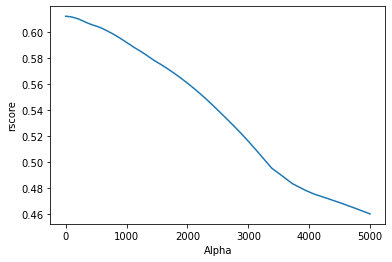

0.6123274284658744


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.333e+12, tolerance: 1.989e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

<Figure size 432x288 with 0 Axes>

In [183]:
lasso_reg = Lasso_Model(X_train, y_train)

In [184]:
Lasso_model_test(X_test,y_test, lasso_reg)

0.5859381261679673
1117179976.6075997


,Features,lasso_reg_Weight_lower_salary,lasso_reg_Weight_upper_salary
0,eligibility_undergraduate,-7134.996514,-10302.883274
1,eligibility_postgraduate,-6922.152426,-9201.196328
2,eligibility_high school diploma,-5614.328168,-8939.183865
3,contract_type_Full-time,-2206.555842,-2052.780110
4,title scraped for_Data Analyst,-2021.892488,-2991.518163
5,year_of_exp,-940.070092,-1093.614785
6,Position_Mid-Level,2230.723452,4742.060578
7,title scraped for_Web Developer,6475.049800,8211.853366
8,Position_Senior Level,8955.445993,13771.795090
9,title scraped for_Data Scientist,15433.312287,22038.135090


In [185]:
{0: 'year_of_exp', 1: 'title scraped for_Data Analyst', 2: 'title scraped for_Data Scientist', 3: 'title scraped for_Machine Learning Engineer', 4: 'title scraped for_Web Developer', 5: 'Country_UK', 6: 'Country_USA', 7: 'Position_Mid-Level', 8: 'Position_Senior Level', 9: 'contract_type_Full-time', 10: 'eligibility_high school diploma', 11: 'eligibility_postgraduate', 12: 'eligibility_undergraduate'}

{0: 'year_of_exp',
 1: 'title scraped for_Data Analyst',
 2: 'title scraped for_Data Scientist',
 3: 'title scraped for_Machine Learning Engineer',
 4: 'title scraped for_Web Developer',
 5: 'Country_UK',
 6: 'Country_USA',
 7: 'Position_Mid-Level',
 8: 'Position_Senior Level',
 9: 'contract_type_Full-time',
 10: 'eligibility_high school diploma',
 11: 'eligibility_postgraduate',
 12: 'eligibility_undergraduate'}

In [200]:
dataset = [4,
           0,0,0,0, 
           0, 1, 
           1, 0, 
           0, 
           0, 0, 0]

In [201]:
test = pd.DataFrame(dataset)
test = test.T.values
lasso_reg.predict(test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


array([[ 88985.54948529, 115137.63814788]])

### Saving the model for UK

In [202]:
import pickle
filename = 'Updated Lasso Model for UK_IND_US.pkl'
pickle.dump(lasso_reg, open(filename, 'wb'))